<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EC%97%B0%EA%B4%80%EC%84%B1%EB%B6%84%EC%84%9D_Groceries_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------
### 3. arulesViz 패키지에 있는 Groceries 데이터 셋을 활용하여 연관성 분석을 실시하시오
---------------------------------------------------------------------------

In [ ]:
교수님 ,, 어렵습니다 ,,G
roceries

In [ ]:
추천시스템 이론 개요 및 arules, arulesViz패키지 apriori알고리즘 활용

# **목차**

### **1. 장바구니 분석(연관성 알고리즘)`arules`, `arulesViz`::<BR>**
###### ✅알고리즘: apriori, ECLAT
###### 1-1. 데이터 준비
###### 1-2. 모델링
###### 1-3. 시각화

### **2. 추천 엔진`recommender lab`::**
#### 2-1. 사용자 기반 협업 필터링(User-based collaborative filering, UBCF)
###### ✅알고리즘: KNN, 유사성 측정값(피어슨 상관계수, 코사인 유사도)
#### 2-2. 아이템 기반 협업 필터링(Item-based collaborative filtering, IBCF)<BR>
######  ✅알고리즘:유사성 측정값(피어슨 상관계수, 코사인 유사도)<BR>
#### 2-3. 특이값 분해(SVD)와 주성분 분석(PCA)
### **3. 순차적 분석기법 `TraMineR`::<br>**
###### ✅알고리즘: 전이조합, 비유사도 행렬

### **1. 장바구니 분석**<br>
1) 최적 상품이나 서비스 조합 찾아내서 ⏩ 마케팅 <br>
2) 사기검출(fraud detection), 의료서비스<br>
3) if ~ then<br>
4) 아이템 세트(item set): 데이터 세트 안에서 1개 이상의 물품의 집합<br>
5) 지지도(support)
- 관심 있는 아이템 세트를 포함하는 데이터 거래의 비율<br>
- 좋은 규칙(빈도가 많은, 구성비가 높은)을 찾거나, 불필요한 연산을 줄일 때(pruning, 가지치기)의 기준

6) 신뢰도(confidence): 누가 x를 샀을 때, y를 사는 조건부 확률 `P(Y|X)`
  - X: 선행사건(antecedent), 좌변(LHS)
  - Y: 결과(cosequence), 우변(RHS)

7) 향상도(lift): 
- X,Y가 함께 일어난 지지도 / X,Y독립가정, 동시에 일어날 수 있는 확률{(X의 마지널)*(Y의 마지널) }<br>

8) ✅알고리즘
- apriori: 어떤 아이템 세트가 자주 나타나면 ⏩ 모든 부분 집합 또한 자주 나타남
  - 최소 빈도(지지도) 설정 *k=l* 
  - 지정된 지지도보다 같거나 더 긴 길이의 아이템 셋 만듦
  - *k+1* 부터 *k+n*까지 반복 ⏩ 지지도보다 낮은 아이템 셋 제거
  - 새로운 아이템 셋 발견되지 않을 때까지 반복


###### **1-1. 데이터 준비**

In [1]:
#패키지설치
install.packages("arules"); library(arules)
install.packages("arulesViz"); library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [2]:
#데이터 로드
data(Groceries)
gr<-Groceries
#간단 구조 확인
head(gr)
str(gr)

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


1. transaction 클래스 즉, 희소 행렬 오브젝트(sparse matrix object)
2. #as(df, "transantions")

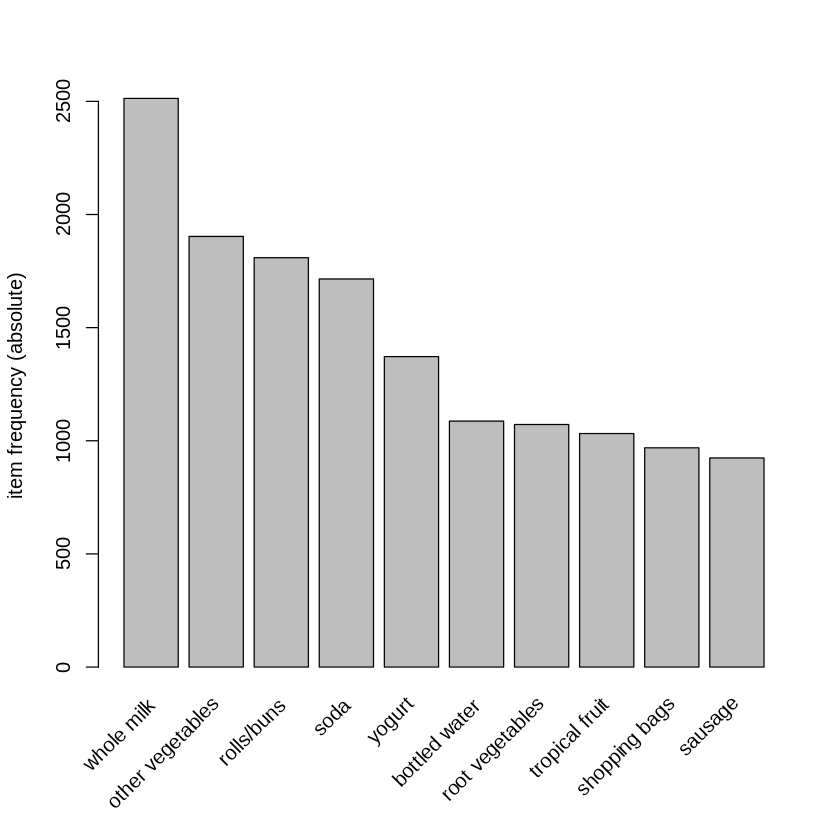

In [3]:
#데이터탐색
itemFrequencyPlot( gr, topN=10, type="absolute")

* 가장 자주 팔림 품목: whole milk

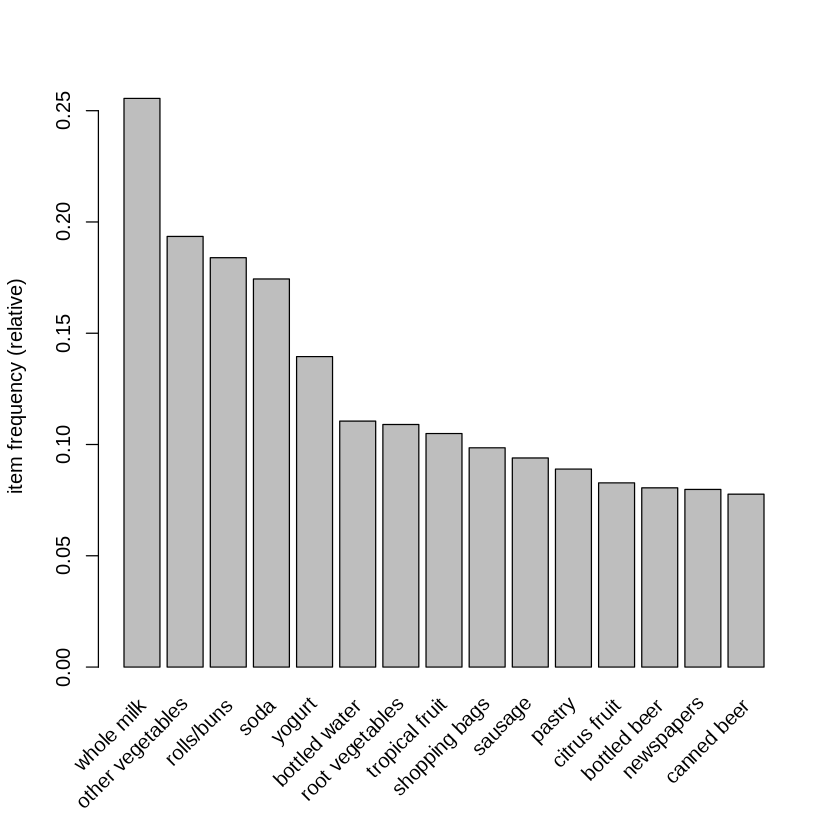

In [4]:
#상대빈도
itemFrequencyPlot(gr, topN=15)

- 맥주는 13, 15번째로 많이 팔림
-10% 미만의 소비자가 병맥주와 캔맥주를 구매함

###### **1-2. 모델링**

- paraneter: 최소 지지도, 최소 신뢰도, 아이템 세트가 가질 수 있는 장바구니 크기 민맥스값

In [7]:
fit<-apriori(gr, parameter = list(supp=0.001, conf=0.9, maxlen=4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(gr, parameter = list(supp = 0.001, conf = 0.9, maxlen = 4)):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.02s].
writing ... [67 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


1. 최소 지지도: 1000거래중 1
2. 최소 신뢰도: 0.9
3. 최대 연관될 수 있는 아이템들 수: 4

In [8]:
fit # 67가지 규칙 만듦

set of 67 rules 

In [18]:
#규칙확인
options(digits = 2)
fit<-sort(fit, by="lift", decreasing = TRUE) #향상도 내림차순으로 재정렬
#class(fit)
#summary(fit)
inspect(fit[1:5,])

    lhs                      rhs                support confidence coverage lift count
[1] {liquor,                                                                          
     red/blush wine}      => {bottled beer}      0.0019       0.90   0.0021 11.2    19
[2] {root vegetables,                                                                 
     butter,                                                                          
     cream cheese }       => {yogurt}            0.0010       0.91   0.0011  6.5    10
[3] {citrus fruit,                                                                    
     root vegetables,                                                                 
     soft cheese}         => {other vegetables}  0.0010       1.00   0.0010  5.2    10
[4] {pip fruit,                                                                       
     whipped/sour cream,                                                              
     brown bread}         => {other vegetab

1. 최소 지지도를 1000거래중 1거래로 했지만 ,, 가장 큰 향상도를 가진 규칙이 1000거래중 1.9거래를 하는건 보편적이진 않음

In [21]:
#그래서 신뢰도 기준으로 재정렬
fit<-sort(fit, by="confidence", decreasing = TRUE)
inspect(fit[1:5,])

    lhs                      rhs                support confidence coverage lift count
[1] {citrus fruit,                                                                    
     root vegetables,                                                                 
     soft cheese}         => {other vegetables}  0.0010          1   0.0010  5.2    10
[2] {pip fruit,                                                                       
     whipped/sour cream,                                                              
     brown bread}         => {other vegetables}  0.0011          1   0.0011  5.2    11
[3] {rice,                                                                            
     sugar}               => {whole milk}        0.0012          1   0.0012  3.9    12
[4] {canned fish,                                                                     
     hygiene articles}    => {whole milk}        0.0011          1   0.0011  3.9    11
[5] {root vegetables,                      

1. 신뢰도 100%

In [25]:
#맥주에 관한걸 찾아보자
tab<-crossTable(gr) #1.교차표생성
tab[1:3, 1:3] #2. 일단 첫 (3,3)행렬에서 아이템 함께 등장하는 횟수 확인
#nrow(gr)

,frankfurter,sausage,liver loaf
frankfurter,580,99,7
sausage,99,924,10
liver loaf,7,10,50


1. liver loaf를 구매한 횟수는 9835중 50회 밖에 안됨
2. 근데 소세지 924번 구매한 와중에 리버로프 10번이나 삼

In [28]:
#맥주로 넘어가보자
tab["bottled beer", "bottled beer"]

[1] 792

1. 병맥주가 포함된 거래는 792회 있었다.

In [29]:
tab["bottled beer", "canned beer"]

[1] 26

1. 사람들은 병맥주나 캔맥주 중 하나를 주로 마신다는 가설 부합

In [32]:
#병맥주 규칙 추출
#appearance추가 -> (좌)rhs값을 증가시키는 품목들로 지정하겠다. (우) 병맥주를 구매할 확률 
beer_fit<-apriori(gr, parameter= list(
                        support=0.0015, confidence=0.3),
                      appearance= list(
                        default="lhs", rhs="bottled beer")  
                    )
beer_fit

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5  0.0015      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [153 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 4 rules 

1. 규칙 4개 찾음

In [35]:
beer_fit<-sort(beer_fit, decreasing = TRUE, by="lift")
inspect(beer_fit)

    lhs                                   rhs            support confidence
[1] {liquor, red/blush wine}           => {bottled beer} 0.0019  0.90      
[2] {liquor}                           => {bottled beer} 0.0047  0.42      
[3] {soda, red/blush wine}             => {bottled beer} 0.0016  0.36      
[4] {other vegetables, red/blush wine} => {bottled beer} 0.0015  0.31      
    coverage lift count
[1] 0.0021   11.2 19   
[2] 0.0111    5.2 46   
[3] 0.0046    4.4 16   
[4] 0.0050    3.8 15   


1. 모든 경우에 병맥주의 구매는 증류주, 레드와인과 연관이 있음
2. 화이트 와인과는 연관이 없다..!!

In [41]:
#그렇다면 와인의 종류별로 병맥주와 함께 구매되는 횟수를 살펴보자
tab["bottled beer", "red/blush wine"] /tab["red/blush wine", "red/blush wine"]
tab["bottled beer", "white wine"]/tab["white wine","white wine"]

[1] 0.25

[1] 0.12

1. 🟥wine을 구매한 경우-> 0.25 확률로 병🍺 구매 😊
2. ⬜wine을 구매한 경우-> 0.12로 확률 줄어듦 😥
3. 이유는 본 분석으로는 알 수 없지만, 상품배치에는 도움됨

###### 1-3. 시각화

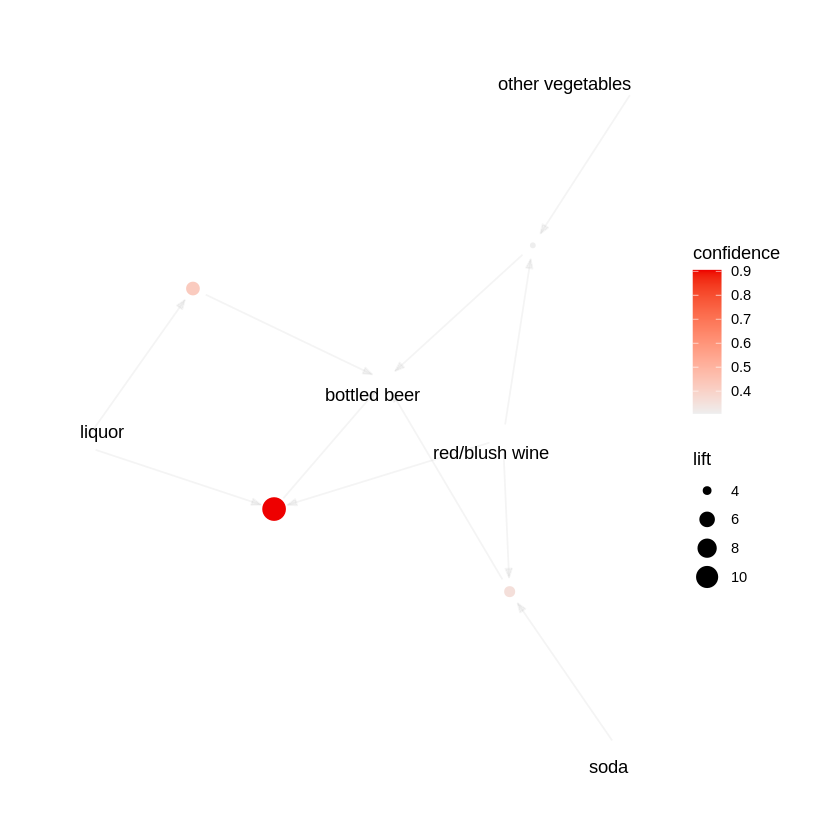

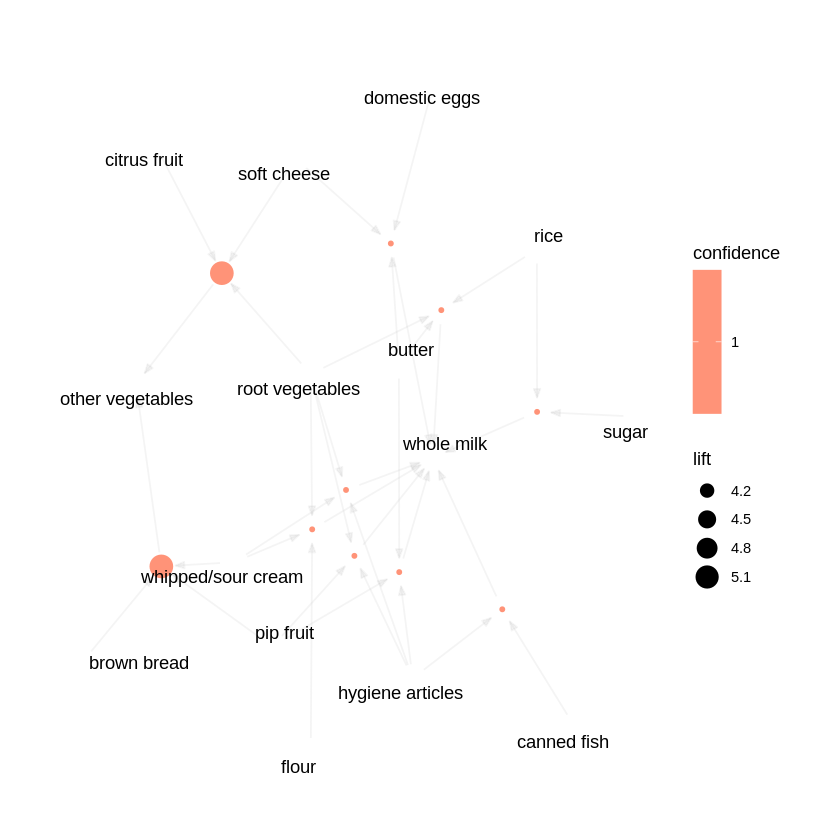

In [49]:
#규칙 시각화
#아래는 신뢰도 바탕, 향상도 시각화
plot(beer_fit,method="graph", measure="lift", shading="confidence")
plot(head(fit, n = 10), method = "graph", measure="lift", shading="confidence")

1. 맥주 핏에서 liquor과 red wine이 가장 높은 향샹도, 신뢰도 보여줌


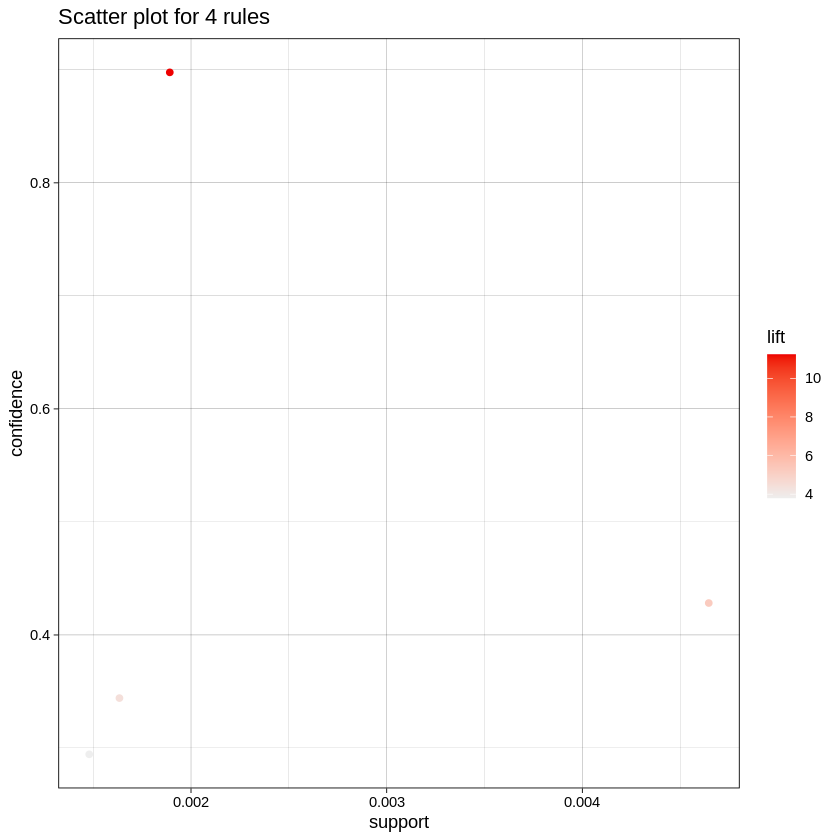

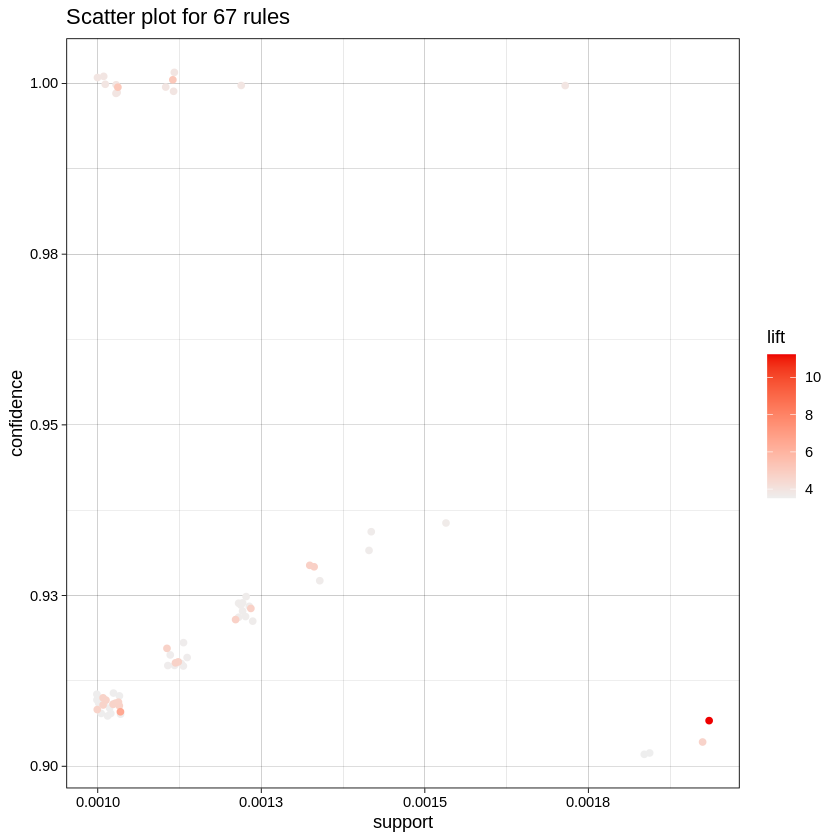

In [44]:
plot(beer_fit,jitter = 1)
plot(fit,jitter = 1)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



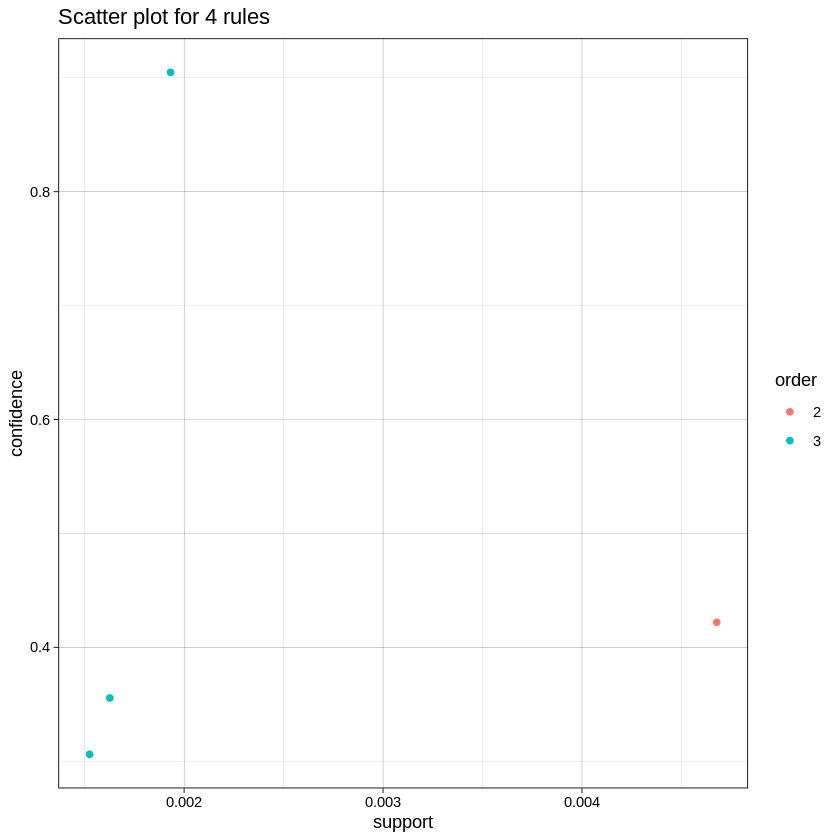

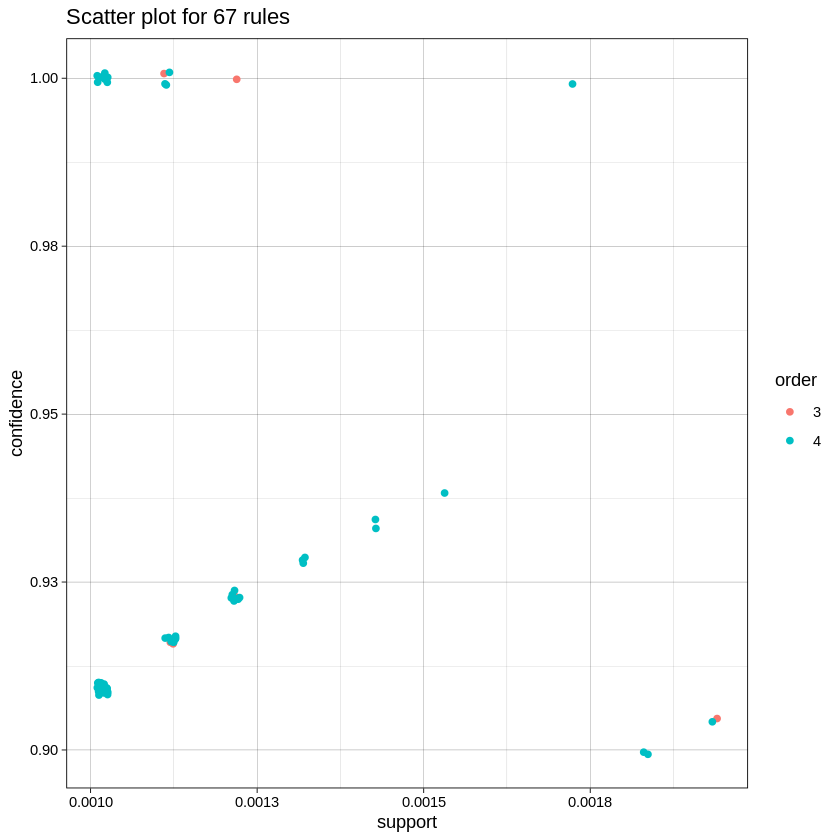

In [46]:
plot(beer_fit, shading = "order")
plot(fit, shading = "order") 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



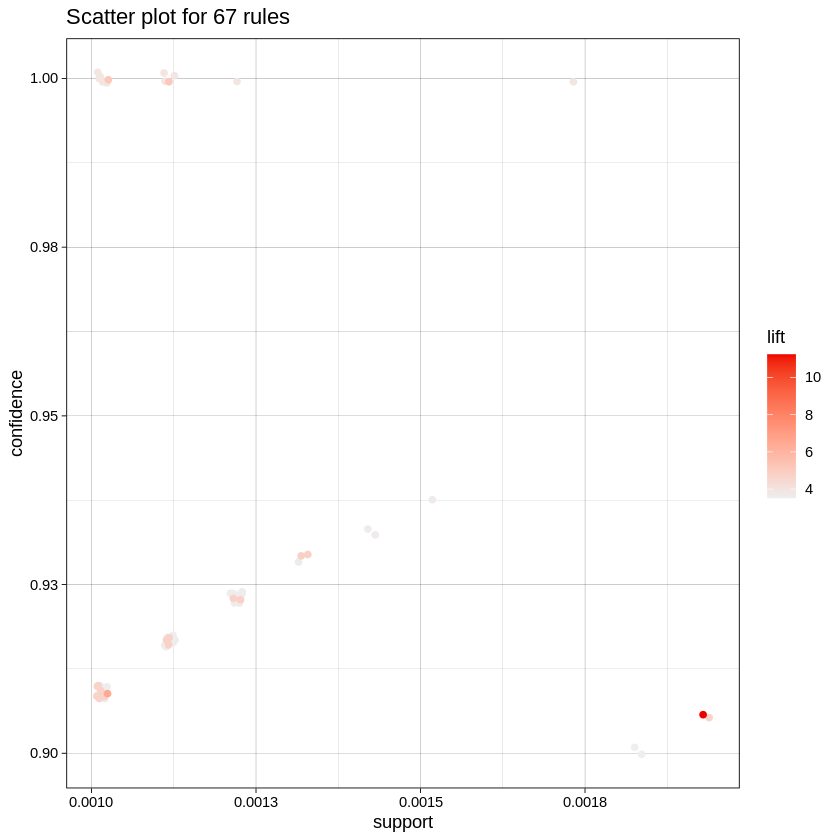

In [51]:
 plot(fit)

https://cran.r-project.org/web/packages/arulesViz/vignettes/arulesViz.pdf

In [ ]:
gotjr,,, ,,
,,
sksms rkawk ~ ~ ~꿈을 꾸는 감자~감자가~ 진화하면~돼지감자

[ref1.추천화시스템-03연관분석(Association Analysis)알고리즘](https://velog.io/@redgem92/%EC%B6%94%EC%B2%9C%ED%99%94-%EC%8B%9C%EC%8A%A4%ED%85%9C-03.-%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9DAssociation-Analysis-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)<BR>
[ref2. recommendation_system
](https://github.com/pray92/recommendation_system) <br>
ref3. R로 마스터하는 머신러닝. 코리 레스마이스터. p337-382<br>
[ref4.지지도](https://rfriend.tistory.com/191)<br>
[re5. 시각화](https://rpubs.com/Bidhansubedi7/834608)